In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.realpath('..'))
%matplotlib inline

In [2]:
application=pd.read_csv('application_record.csv',index_col='ID')
credit=pd.read_csv('credit_record.csv',index_col='ID')

C:\Users\santh\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
application.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


**all -ve values are previous day or month values, ie 0 is current month or day**

In [5]:
application.info()
print("")
application.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(7), object(8)
memory usage: 60.2+ MB



,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
credit.info()
print("")
credit.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 5001711 to 5150487
Data columns (total 2 columns):
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(1), object(1)
memory usage: 24.0+ MB



,MONTHS_BALANCE
count,1.048575e+06
mean,-1.913700e+01
std,1.402350e+01
min,-6.000000e+01
25%,-2.900000e+01
50%,-1.700000e+01
75%,-7.000000e+00
max,0.000000e+00


### Distinct values to work with

In [7]:
# distinct record in 2 datasets
uniqueID=(list(set(application.index).intersection(set(credit.index))))
print('Unique values in both the files are {}'.format(len(uniqueID)))

Unique values in both the files are 36457


### Filtering Distinct values in both files

In [8]:
application=application.loc[uniqueID]
credit=credit.loc[uniqueID]

In [9]:
print("Application dataframe records that are present in Credit dataframe only :")
print(application.shape)
print("Credit dataframe records, will have multiple rows of singale customer but will not have other records than application dataset:")
print(credit.shape)

Application dataframe records that are present in Credit dataframe only :
(36457, 17)
Credit dataframe records, will have multiple rows of singale customer but will not have other records than application dataset:
(777715, 2)


### Create a unique Customer ID

In [10]:
application_clean = application.sort_values(by = application.columns.to_list())
application_clean['cust_id'] = application.sum(axis=1).map(hash)

In [11]:
application_clean.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id
ID,,,,,,,,,,,,,,,,,,
5126174,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5126175,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5054382,F,N,N,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20836,365243,1,0,0,0,NaN,2.0,375910
5132319,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,NaN,2.0,378941
5132320,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,NaN,2.0,378941


### Adding the customer ID to credit dataframe

In [12]:
grouped_cust = application.sum(axis=1).map(hash).reset_index().rename(columns={0:'customer_id'})
grouped_cust = grouped_cust.set_index('ID')
grouped_cust

,customer_id
ID,
5112591,68169
5112592,68169
5112593,68169
5112594,68169
5112597,68169
...,...
5111201,159906
5111203,159906
5111204,159906


In [13]:
credit_trsf = credit.merge(grouped_cust, how = 'inner', on = 'ID').reset_index()[['customer_id','ID', 'MONTHS_BALANCE', 'STATUS']]

In [14]:
credit_trsf

,customer_id,ID,MONTHS_BALANCE,STATUS
0,68169,5112591,0,C
1,68169,5112591,-1,C
2,68169,5112591,-2,C
3,68169,5112591,-3,C
4,68169,5112591,-4,C
...,...,...,...,...
777710,42012,5111206,-39,0
777711,42012,5111206,-40,0
777712,42012,5111206,-41,0
777713,42012,5111206,-42,0


In [15]:
cred_df_g = credit_trsf.sort_values(by=['customer_id', 'ID', 'MONTHS_BALANCE'], ascending = [True, True, False]).reset_index(drop=True)

In [16]:
#check customer ID once
cred_df_g

,customer_id,ID,MONTHS_BALANCE,STATUS
0,6009,5088968,0,X
1,6009,5088968,-1,X
2,6009,5088968,-2,X
3,6009,5088968,-3,X
4,6009,5088968,-4,X
...,...,...,...,...
777710,1152921504607551491,5054280,-31,2
777711,1152921504607551491,5054280,-32,2
777712,1152921504607551491,5054280,-33,1
777713,1152921504607551491,5054280,-34,0


In [17]:
cred_df_g['link_ID'] = cred_df_g.groupby(['customer_id','ID'], sort = False).ngroup().add(1)

In [18]:
cred_df_g

,customer_id,ID,MONTHS_BALANCE,STATUS,link_ID
0,6009,5088968,0,X,1
1,6009,5088968,-1,X,1
2,6009,5088968,-2,X,1
3,6009,5088968,-3,X,1
4,6009,5088968,-4,X,1
...,...,...,...,...,...
777710,1152921504607551491,5054280,-31,2,36457
777711,1152921504607551491,5054280,-32,2,36457
777712,1152921504607551491,5054280,-33,1,36457
777713,1152921504607551491,5054280,-34,0,36457


In [19]:
cred_df_g.drop(columns = ['ID'], inplace=True)
cred_df_g = cred_df_g[['customer_id', 'link_ID', 'MONTHS_BALANCE', 'STATUS']]

In [20]:
cred_df_g

,customer_id,link_ID,MONTHS_BALANCE,STATUS
0,6009,1,0,X
1,6009,1,-1,X
2,6009,1,-2,X
3,6009,1,-3,X
4,6009,1,-4,X
...,...,...,...,...
777710,1152921504607551491,36457,-31,2
777711,1152921504607551491,36457,-32,2
777712,1152921504607551491,36457,-33,1
777713,1152921504607551491,36457,-34,0


### Labelling customer behaviour in credit data

In [26]:
series1=cred_df_g.groupby('customer_id').size()
temp_df1=series1.to_frame(name='months_in_book')
temp_df1

,months_in_book
customer_id,
6009,138
6553,29
7068,49
7566,32
11709,14
...,...
1152921504607025632,58
1152921504607221649,65
1152921504607238002,50


In [27]:
series2=cred_df_g.groupby(['customer_id'])['link_ID'].nunique()
temp_df2=series2.to_frame('contracts_nr')
temp_df2

,contracts_nr
customer_id,
6009,8
6553,1
7068,2
7566,5
11709,1
...,...
1152921504607025632,6
1152921504607221649,3
1152921504607238002,5


In [28]:
credit_clean = pd.merge(temp_df1, temp_df2, on='customer_id')
credit_clean

,months_in_book,contracts_nr
customer_id,,
6009,138,8
6553,29,1
7068,49,2
7566,32,5
11709,14,1
...,...,...
1152921504607025632,58,6
1152921504607221649,65,3
1152921504607238002,50,5


### Missing Data

In [29]:
credit_clean.isnull().sum()

months_in_book    0
contracts_nr      0
dtype: int64

In [30]:
application_clean.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
cust_id                    0
dtype: int64

In [31]:
application_clean.OCCUPATION_TYPE.unique()
# nan is found, will change it to Not Available
application_clean['OCCUPATION_TYPE']=application_clean['OCCUPATION_TYPE'].fillna('Not Available')

In [32]:
application_clean['FLAG_OWN_CAR']=application_clean['FLAG_OWN_CAR'].replace({'Y':1,'N':0})

In [33]:
application_clean['FLAG_OWN_REALTY']=application_clean['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})
application_clean.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id
ID,,,,,,,,,,,,,,,,,,
5126174,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5126175,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5054382,F,0,0,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20836,365243,1,0,0,0,Not Available,2.0,375910
5132319,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,378941
5132320,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,378941


### Merging Application and credit records to Get X & Y dataset

In [34]:
credit_clean.reset_index(inplace=True)
credit_clean

,customer_id,months_in_book,contracts_nr
0,6009,138,8
1,6553,29,1
2,7068,49,2
3,7566,32,5
4,11709,14,1
...,...,...,...
9486,1152921504607025632,58,6
9487,1152921504607221649,65,3
9488,1152921504607238002,50,5
9489,1152921504607318176,41,3


In [35]:
X=application_clean.reset_index().merge(credit_clean, left_on=application_clean.cust_id, right_on=credit_clean.customer_id, how='inner')
X

,key_0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id,customer_id,months_in_book,contracts_nr
0,7068,5126174,F,0,0,0,27000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Managers,2.0,7068,7068,49,2
1,7068,5126175,F,0,0,0,27000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Managers,2.0,7068,7068,49,2
2,375910,5054382,F,0,0,0,31500.0,Pensioner,Secondary / secondary special,Married,...,1,0,0,0,Not Available,2.0,375910,375910,13,1
3,378941,5132319,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,...,1,0,0,0,Not Available,2.0,378941,378941,276,8
4,378941,5132320,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,...,1,0,0,0,Not Available,2.0,378941,378941,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,188402,5135540,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Managers,7.0,188402,188402,121,8
36453,188402,5135541,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Managers,7.0,188402,188402,121,8
36454,205587,5061207,M,1,1,14,225000.0,Working,Secondary / secondary special,Separated,...,1,0,0,0,Drivers,15.0,205587,205587,111,3
36455,205587,5061210,M,1,1,14,225000.0,Working,Secondary / secondary special,Separated,...,1,0,0,0,Drivers,15.0,205587,205587,111,3


In [36]:
X.drop(columns=['key_0','cust_id','customer_id']).set_index('ID')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,months_in_book,contracts_nr
ID,,,,,,,,,,,,,,,,,,,
5126174,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,49,2
5126175,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,49,2
5054382,F,0,0,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20836,365243,1,0,0,0,Not Available,2.0,13,1
5132319,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,276,8
5132320,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135540,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,121,8
5135541,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,121,8
5061207,M,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,111,3


### Features

In [37]:
# Flag mobile has no variations, hence can drop it
X.FLAG_MOBIL.unique()

array([1], dtype=int64)

In [38]:
X.drop(columns=['FLAG_MOBIL'],inplace=True)

In [39]:
X

,key_0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id,customer_id,months_in_book,contracts_nr
0,7068,5126174,F,0,0,0,27000.0,Working,Higher education,Civil marriage,...,-5067,1,0,0,Managers,2.0,7068,7068,49,2
1,7068,5126175,F,0,0,0,27000.0,Working,Higher education,Civil marriage,...,-5067,1,0,0,Managers,2.0,7068,7068,49,2
2,375910,5054382,F,0,0,0,31500.0,Pensioner,Secondary / secondary special,Married,...,365243,0,0,0,Not Available,2.0,375910,375910,13,1
3,378941,5132319,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,...,365243,0,0,0,Not Available,2.0,378941,378941,276,8
4,378941,5132320,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,...,365243,0,0,0,Not Available,2.0,378941,378941,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,188402,5135540,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,...,-2727,0,0,0,Managers,7.0,188402,188402,121,8
36453,188402,5135541,M,1,1,5,202500.0,Working,Secondary / secondary special,Married,...,-2727,0,0,0,Managers,7.0,188402,188402,121,8
36454,205587,5061207,M,1,1,14,225000.0,Working,Secondary / secondary special,Separated,...,-1689,0,0,0,Drivers,15.0,205587,205587,111,3
36455,205587,5061210,M,1,1,14,225000.0,Working,Secondary / secondary special,Separated,...,-1689,0,0,0,Drivers,15.0,205587,205587,111,3


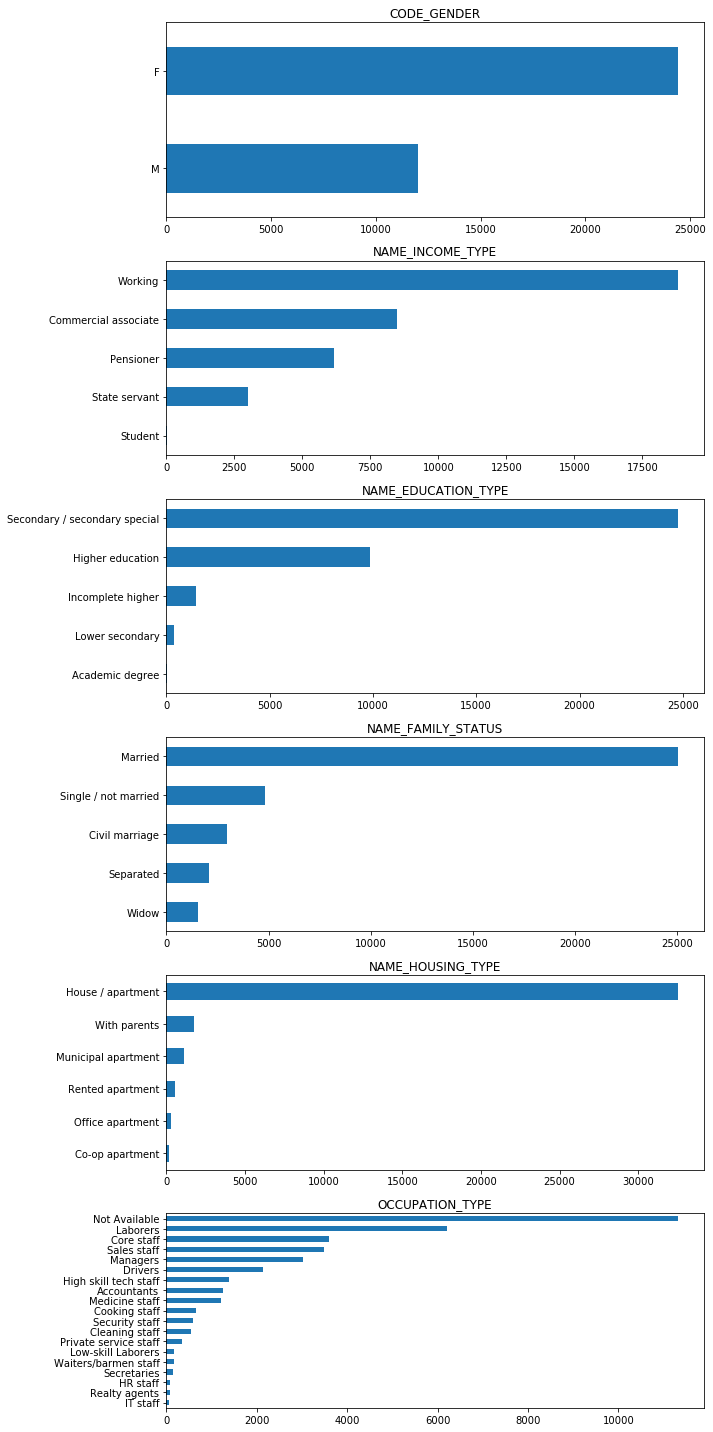

In [40]:
# Distribution of categorical features.
category_cols = [x for x in application_clean.columns if x.startswith('CODE_') or x.startswith('NAME_') or x.startswith('OCCUPATION_') ] 

fig, axes = plt.subplots( nrows= len(category_cols),  figsize=(10,20))
for col, ax in zip(X[category_cols], axes):
    X[col].value_counts().sort_values().plot.barh(ax=ax, title=col)

plt.tight_layout()    
plt.show()

### Top profiles in categories

In [41]:
pd.DataFrame(X[category_cols].groupby(category_cols).size().sort_values(ascending=False),columns=['Count'])

Count
CODE_GENDER NAME_INCOME_TYPE NAME_EDUCATION_TYPE           NAME_FAMILY_STATUS   NAME_HOUSING_TYPE   OCCUPATION_TYPE       
F           Pensioner        Secondary / secondary special Married              House / apartment   Not Available     2461
M           Working          Secondary / secondary special Married              House / apartment   Laborers          1553
F           Working          Secondary / secondary special Married              House / apartment   Sales staff        926
                                                                                                    Not Available      906
                                                                                                    Laborers           873
...                                                                                                                    ...
M           State servant    Higher education              Civil marriage       House / apartment   Not Available        1
F           Pensioner        Secondary / secondary special Civil marriage       Municipal apartment Laborers             1
                                                                                With parents        Not Available        1
                                                           Married              Co-op apartment     Not Available        1
                             Higher education              Single / not married House / apartment   Core staff           1

[1302 rows x 1 columns]

#### 'Not available' also forms part of the top 5 w.r.to Occupation type... either it should be filled, deleted or taken as a seperate group

In [42]:
# Distribution of numeric features.
numeric=['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','months_in_book','contracts_nr']

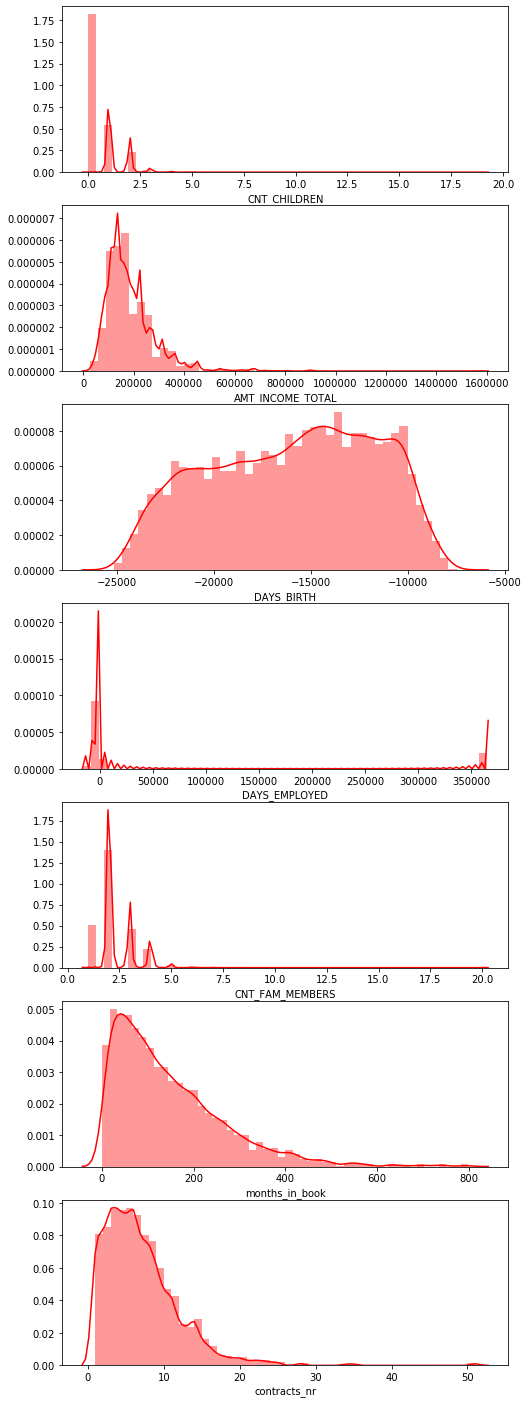

In [43]:
fig, axes = plt.subplots(nrows=len(numeric), figsize=(8,25))

for col, ax in zip(X[numeric], axes):
    sns.distplot(X[col], ax=ax ,color='r')

#plt.tight_layout()    
plt.show()

**Not symetric or normally distributed**

**Hence finding the outliers**

In [44]:
X[numeric].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,months_in_book,contracts_nr
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,2.198453,145.816002,6.942892
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.911686,120.244185,5.013431
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,1.000000,1.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,2.000000,54.000000,3.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,2.000000,114.000000,6.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,3.000000,206.000000,9.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,20.000000,799.000000,51.000000


**wrong values in Days Employed**

**after analysing, it seems all pensioners are marked as +36457, ie, unemployed**

**students are also marked as employed with -ve DaysEmployees, still considered as it might be part time**


In [45]:
X[X['DAYS_EMPLOYED'] > 0].NAME_INCOME_TYPE.unique()

array(['Pensioner'], dtype=object)

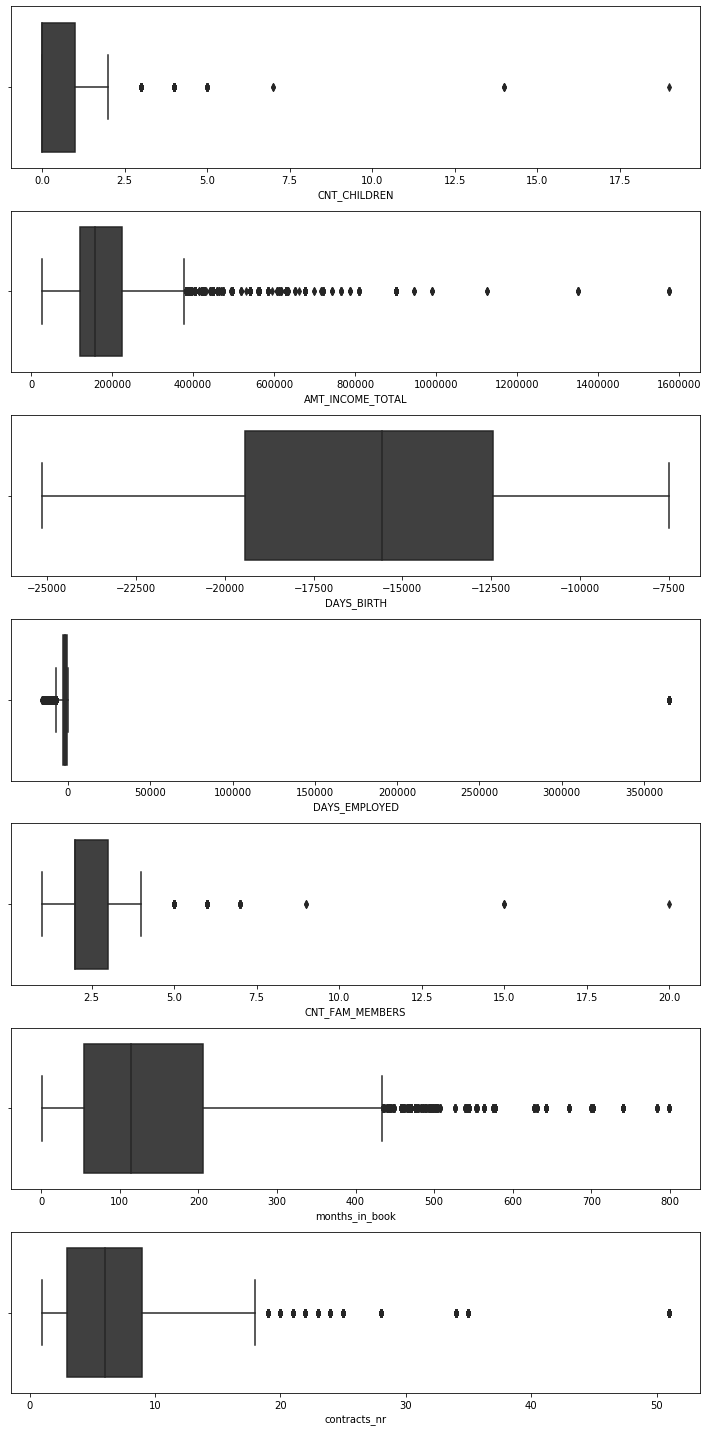

In [46]:
fig, axes = plt.subplots( nrows= 7, figsize=(10,20))

for col, ax in zip(X[numeric], axes):
    sns.boxplot( x = X[col], ax=ax, orient = 'h',color='.25' )

plt.tight_layout()    
plt.show()

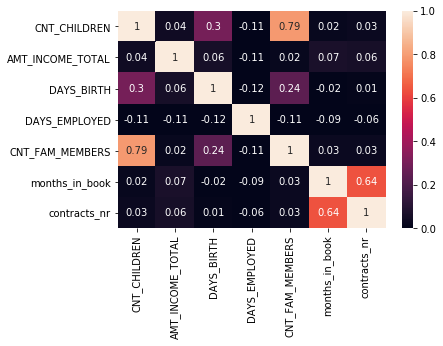

In [47]:
# using kendall as variables are not normal distributions
sns.heatmap(round(X[numeric].corr('kendall'),2), annot=True,vmin=0, vmax=1)
# relationship between contracts_nr & months_in_book and CNT_FAM_MEMBERS & CNT_CHILDREN are strong

In [48]:
from scipy.stats import kendalltau
stat, p = kendalltau(X['CNT_CHILDREN'], X['CNT_FAM_MEMBERS'])
p

0.0

In [49]:
from scipy.stats import kendalltau
stat, p = kendalltau(X['contracts_nr'], X['months_in_book'])
p

0.0

##### Since p<0.05, statistically these are dependent.
##### Hence, removing CNT_Childern and contracts_nr

In [50]:
numeric.remove('CNT_CHILDREN')
numeric.remove('contracts_nr')
X.drop(columns=['CNT_CHILDREN','contracts_nr','key_0'],inplace=True)

In [51]:
X.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id,customer_id,months_in_book
0,5126174,F,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,0,0,Managers,2.0,7068,7068,49
1,5126175,F,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,0,0,Managers,2.0,7068,7068,49
2,5054382,F,0,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20836,365243,0,0,0,Not Available,2.0,375910,375910,13
3,5132319,F,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,0,0,0,Not Available,2.0,378941,378941,276
4,5132320,F,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,0,0,0,Not Available,2.0,378941,378941,276


(array([3.29536e+05, 2.90654e+05, 1.45950e+05, 0.00000e+00, 8.74700e+03,
        8.01000e+02, 0.00000e+00, 1.52700e+03, 2.14000e+02, 2.86000e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

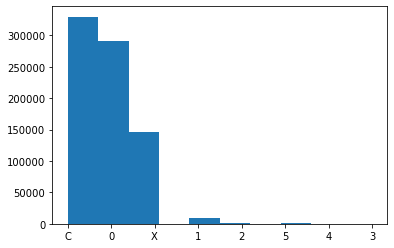

In [52]:
# finding the % of status in credit record
plt.hist(credit['STATUS'])

### Clubbing similar categorical geatures

In [54]:
print(X['NAME_INCOME_TYPE'].value_counts())
print("")
print('----------------after clubbing -------------------------------')
print(X['NAME_INCOME_TYPE'].replace({'Commercial associate':"Working",'State servant':"Working"}).value_counts())

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

----------------after clubbing -------------------------------
Working      30294
Pensioner     6152
Student         11
Name: NAME_INCOME_TYPE, dtype: int64


In [55]:
print(X['NAME_EDUCATION_TYPE'].value_counts())
print("")
print('----------------after clubbing -------------------------------')
print(X['NAME_EDUCATION_TYPE'].replace({'Incomplete higher':"Secondary / secondary special"}).value_counts())

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

----------------after clubbing -------------------------------
Secondary / secondary special    26187
Higher education                  9864
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64


In [56]:
print(X['NAME_FAMILY_STATUS'].value_counts())
print("")
print('----------------after clubbing -------------------------------')
print(X['NAME_FAMILY_STATUS'].replace({'Civil marriage':"Married"}).value_counts())

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

----------------after clubbing -------------------------------
Married                 27993
Single / not married     4829
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64


In [57]:
print(X['NAME_HOUSING_TYPE'].value_counts())
print("")
print('----------------after clubbing -------------------------------')
print(X['NAME_HOUSING_TYPE'].replace({'Co-op apartment':"House / apartment",'Municipal apartment':"Municipal_Office apartment",'Office apartment':"Municipal_Office apartment"}).value_counts())

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

----------------after clubbing -------------------------------
House / apartment             32716
With parents                   1776
Municipal_Office apartment     1390
Rented apartment                575
Name: NAME_HOUSING_TYPE, dtype: int64


### we can club Occupation types based on the income

In [58]:
print(X['OCCUPATION_TYPE'].value_counts())

Not Available            11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64


          OCCUPATION_TYPE  AMT_INCOME_TOTAL
10               Managers     279117.292829
14          Realty agents     247500.000000
4                 Drivers     209797.240412
0             Accountants     202463.865834
7                IT staff     199860.000000
13  Private service staff     198863.372093
6   High skill tech staff     196053.579176
5                HR staff     193764.705882
3              Core staff     190172.786967
8                Laborers     179794.282402
17         Security staff     177037.753378
15            Sales staff     174984.897848
12          Not Available     168599.123819
16            Secretaries     168079.470199
11         Medicine staff     166114.618061
18   Waiters/barmen staff     156206.896552
1          Cleaning staff     149141.107078
2           Cooking staff     146517.251908
9      Low-skill Laborers     133920.000000


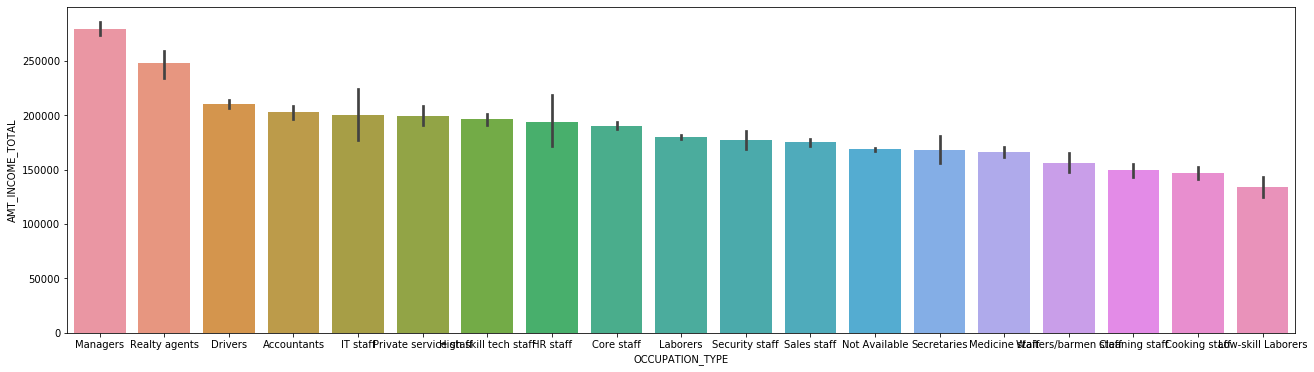

In [59]:
data = pd.DataFrame(X.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()).reset_index().sort_values(by=['AMT_INCOME_TOTAL'], ascending=False)
print(data)
plt.figure(figsize=(22,6))
sns.barplot(data=X, x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',order=data['OCCUPATION_TYPE'])

Occup1: Managers & Realty agents

Occup2: Drivers, Accountants,IT staff, Private service staff & High skill tech staff

Occup3: HR staff & Core staff

Occup4: Laborers, Security staff & Sales staff

Occup5: Not Available, Secretaries, Medicine staff & Waiters/barmen staff

Occup6: Cleaning staff , Cooking staff & Low-skill Laborers

In [60]:
Occupation = {
    'Managers' : 'Occup1',
    'Realty agents' : 'Occup1',
    'Drivers' : 'Occup2',
    'Accountants' : 'Occup2',
    'IT staff' : 'Occup2',
    'Private service staff' : 'Occup2',
    'High skill tech staff' : 'Occup2',
    'HR staff' : 'Occup3',
    'Core staff' : 'Occup3',
    'Laborers' : 'Occup4',
    'Security staff' : 'Occup4',
    'Sales staff' : 'Occup4',
    'Not Available' : 'Occup5',
    'Secretaries' : 'Occup5',
    'Medicine staff' : 'Occup5',
    'Waiters/barmen staff' : 'Occup5',
    'Cleaning staff' : 'Occup6',
    'Cooking staff' : 'Occup6',
    'Low-skill Laborers' : 'Occup6'
}

In [61]:
X['OCCUPATION_TYPE'] = X['OCCUPATION_TYPE'].replace(Occupation)

In [62]:
X['OCCUPATION_TYPE'].value_counts()

Occup5    12855
Occup4    10288
Occup2     5166
Occup3     3676
Occup1     3091
Occup6     1381
Name: OCCUPATION_TYPE, dtype: int64

***After grouping Occupation types***

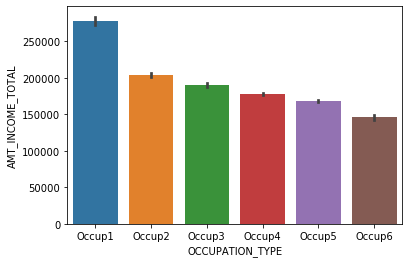

In [63]:
data = pd.DataFrame(X.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()).reset_index().sort_values(by=['AMT_INCOME_TOTAL'], ascending=False)
sns.barplot(data=X, x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',order=data['OCCUPATION_TYPE'])

In [64]:
category_cols  = [x for x in X.columns if x.startswith('CODE_') or x.startswith('NAME_') or x.startswith('OCCUPATION_') ]
category_cols

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [65]:
categories_df=X[category_cols]
df_onehot = pd.get_dummies(categories_df, drop_first=True)

In [66]:
df_onehot

,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Occup2,OCCUPATION_TYPE_Occup3,OCCUPATION_TYPE_Occup4,OCCUPATION_TYPE_Occup5,OCCUPATION_TYPE_Occup6
0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
36453,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
36454,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
36455,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [67]:
X.drop(columns = category_cols, inplace= True)
X = pd.concat([df_onehot, X], axis = 1)

In [68]:
X.head()

,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,...,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,cust_id,customer_id,months_in_book
0,0,0,0,0,1,1,0,0,0,0,...,27000.0,-14869,-5067,1,0,0,2.0,7068,7068,49
1,0,0,0,0,1,1,0,0,0,0,...,27000.0,-14869,-5067,1,0,0,2.0,7068,7068,49
2,0,1,0,0,0,0,0,0,1,1,...,31500.0,-20836,365243,0,0,0,2.0,375910,375910,13
3,0,1,0,0,0,0,0,0,1,1,...,33300.0,-19605,365243,0,0,0,2.0,378941,378941,276
4,0,1,0,0,0,0,0,0,1,1,...,33300.0,-19605,365243,0,0,0,2.0,378941,378941,276


In [69]:
X['FLAG_WORK_PHONE']=X['FLAG_WORK_PHONE'].astype('uint8')
X['FLAG_PHONE']=X['FLAG_PHONE'].astype('uint8')
X['FLAG_EMAIL']=X['FLAG_EMAIL'].astype('uint8')

In [71]:
X.drop(columns=['customer_id','cust_id'],inplace=True)

In [72]:
X

,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,months_in_book
0,0,0,0,0,1,1,0,0,0,0,...,0,0,27000.0,-14869,-5067,1,0,0,2.0,49
1,0,0,0,0,1,1,0,0,0,0,...,0,0,27000.0,-14869,-5067,1,0,0,2.0,49
2,0,1,0,0,0,0,0,0,1,1,...,0,0,31500.0,-20836,365243,0,0,0,2.0,13
3,0,1,0,0,0,0,0,0,1,1,...,0,0,33300.0,-19605,365243,0,0,0,2.0,276
4,0,1,0,0,0,0,0,0,1,1,...,0,0,33300.0,-19605,365243,0,0,0,2.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,0,0,0,1,0,0,0,1,1,...,1,1,202500.0,-11384,-2727,0,0,0,7.0,121
36453,1,0,0,0,1,0,0,0,1,1,...,1,1,202500.0,-11384,-2727,0,0,0,7.0,121
36454,1,0,0,0,1,0,0,0,1,0,...,1,1,225000.0,-17754,-1689,0,0,0,15.0,111
36455,1,0,0,0,1,0,0,0,1,0,...,1,1,225000.0,-17754,-1689,0,0,0,15.0,111


In [76]:
X.columns

Index(['CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Occup2', 'OCCUPATION_TYPE_Occup3',
       'OCCUPATION_TYPE_Occup4', 'OCCUPATION_TYPE_Occup5',
       'OCCUPATION_TYPE_Occup6', 'ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       'FLAG_P

In these above columns we are not observing "customer_type" feature, which we have to predict.